In [1]:
import sys
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pprint

sys.path.append(os.path.abspath('../src/'))
from ActivationFunction import *
from ErrorFunctions import *
from PlotUtils import *
from MyUtils import *
from MatrixNeuralNetwork import *

pd.options.plotting.backend = "plotly"

In [2]:
RANDOM_STATE = 310907

tr_norm_df = pd.read_csv('../data/divided_std_train_0_8.csv')
test_norm_df = pd.read_csv('../data/divided_std_test_0_2.csv')

tr_df = pd.read_csv('../data/divided_train_0_8.csv')
test_df = pd.read_csv('../data/divided_test_0_2.csv')

TR_INPUT = 10
TR_OUTPUT = 3

tr_normalized = tr_norm_df.values
test_normalized = test_norm_df.values
training_set = tr_df.values
test_set = test_df.values

scaler_out = StandardScaler()
scaler_out.fit(training_set[:,TR_INPUT:])

training_len = len(tr_norm_df)
test_len = len(test_norm_df)

In [3]:
tr_normalized.shape

(800, 13)

In [4]:
complex_struct = [[10, SigmoidFunction(2), ['uniform', {'low':-1, 'high':1}]],
          [15, RectifiedLinearUnit(), ['uniform', {'low':0, 'high':1}]],
          [25, HyperbolicTangentFunction(4), ['uniform', {'low':-1, 'high':1}]],
          [50, ExponentialLinearUnit(), ['uniform', {'low':0, 'high':1}]],
          [500, SigmoidFunction(8), ['uniform', {'low':-1, 'high':1}]],
          [3, IdentityFunction(), ['uniform', {'low':-1, 'high':1}]]]


low_fan_in = -0.7*(2/32)
simple_struct = [[32, SigmoidFunction(1), ['uniform', {'low':-0.7*(2/10), 'high':0.7*(2/10)}]],
                 [32, SigmoidFunction(1), ['uniform', {'low':-0.7*(2/32), 'high':0.7*(2/32)}]],
                 [32, SigmoidFunction(1), ['uniform', {'low':-0.7*(2/32), 'high':0.7*(2/32)}]],
                 [3, IdentityFunction(), ['uniform', {'low':-0.75, 'high':0.75}]]]

myNN = MatrixNeuralNetwork(simple_struct, 10, RANDOM_STATE)

In [5]:
hyperparam = myNN.default_hyperparameters_values.copy()
hyperparam['max_epochs'] = 1000
hyperparam['learning_rate'] = 0.05
hyperparam['learning_rate_adjust'] = True
hyperparam['patience'] = -1
hyperparam['batch_size'] = 201
hyperparam['lambda_tikhonov'] = 0.0000001

hyperparam['collect_data'] = True
hyperparam['collect_prediction_data'] = False
hyperparam['collect_weights_data'] = True
hyperparam['collect_batch_data'] = False

In [6]:
hyperparam

{'batch_size': 201,
 'min_epochs': 0,
 'max_epochs': 1000,
 'retraining_error_target': -1.0,
 'retraining_error_tol': 0.1,
 'patience': -1,
 'error_increase_tolerance': 0.0001,
 'lambda_tikhonov': 1e-07,
 'learning_rate': 0.05,
 'learning_rate_adjust': True,
 'lr_decay_tau': 0,
 'lr_decay_multiplier': 0.0,
 'alpha_momentum': 0.0,
 'nesterov_momentum': False,
 'adamax': False,
 'adamax_learning_rate': 0.01,
 'exp_decay_rate_1': 0.9,
 'exp_decay_rate_2': 0.999,
 'collect_data': True,
 'collect_prediction_data': False,
 'collect_weights_data': True,
 'collect_batch_data': False}

In [7]:
myNN.set_hyperparameters(**hyperparam)

In [8]:
stats = myNN.train(tr_normalized[:600], tr_normalized[600:800], metrics_list=[mean_squared_error, mean_euclidean_error], verbose=True);

starting values:  {'batch_size': 201, 'min_epochs': 0, 'max_epochs': 1000, 'retraining_error_target': -1.0, 'retraining_error_tol': 0.1, 'patience': -1, 'error_increase_tolerance': 0.0001, 'lambda_tikhonov': 1e-07, 'learning_rate': 0.05, 'learning_rate_adjust': True, 'lr_decay_tau': 0, 'lr_decay_multiplier': 0.0, 'alpha_momentum': 0.0, 'nesterov_momentum': False, 'adamax': False, 'adamax_learning_rate': 0.01, 'exp_decay_rate_1': 0.9, 'exp_decay_rate_2': 0.999, 'collect_data': True, 'collect_prediction_data': False, 'collect_weights_data': True, 'collect_batch_data': False}


/home/geco/NN_Project_Upgrade/src/MatrixNeuralNetwork.py:346: RuntimeWarning: invalid value encountered in scalar divide
  last_error_increase_percentage = (val_err - last_val_error)/last_val_error


[1/1000] tr time: 0:00:00.252805  | mean_squared_error: tr=3.0664713537090598 val=3.359722155416425 | mean_euclidean_error: tr=1.6872448055767237 val=1.766036311318702
[2/1000] tr time: 0:00:00.252251  | mean_squared_error: tr=2.936566531080006 val=3.1511718033974194 | mean_euclidean_error: tr=1.647142546552665 val=1.7056785544972235
[3/1000] tr time: 0:00:00.250929  | mean_squared_error: tr=2.92573339684676 val=3.1496080512381557 | mean_euclidean_error: tr=1.6476817371172363 val=1.709437701784103
[4/1000] tr time: 0:00:00.251594  | mean_squared_error: tr=2.9264719894750755 val=3.152840691318838 | mean_euclidean_error: tr=1.6453016937798028 val=1.707298777044593
[5/1000] tr time: 0:00:00.242252  | mean_squared_error: tr=2.926096185339318 val=3.1533413465524918 | mean_euclidean_error: tr=1.6452921064584187 val=1.7075131423884542
[6/1000] tr time: 0:00:00.254523  | mean_squared_error: tr=2.9233015470921577 val=3.1597405150613747 | mean_euclidean_error: tr=1.64417652340469 val=1.708878872

In [9]:
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(stats['hyperparameters'])
print()
stats_to_print = ['tr_error_when_to_stop',
                    'epochs',
                    'total_train_time',
                    'mean_epoch_train_time',
                    'additional_metrics']
for string in stats_to_print:
    print(string + ':', stats[string])


{ 'adamax': False,
  'adamax_learning_rate': 0.01,
  'alpha_momentum': 0.0,
  'batch_size': 201,
  'collect_batch_data': False,
  'collect_data': True,
  'collect_prediction_data': False,
  'collect_weights_data': True,
  'error_increase_tolerance': 0.0001,
  'exp_decay_rate_1': 0.9,
  'exp_decay_rate_2': 0.999,
  'lambda_tikhonov': 1e-07,
  'learning_rate': 0.05,
  'learning_rate_adjust': True,
  'lr_decay_multiplier': 0.0,
  'lr_decay_tau': 0,
  'max_epochs': 1000,
  'min_epochs': 0,
  'nesterov_momentum': False,
  'patience': -1,
  'retraining_error_target': -1.0,
  'retraining_error_tol': 0.1}

tr_error_when_to_stop: 0.06584035209965507
epochs: 1000
total_train_time: 0:04:02.057437
mean_epoch_train_time: 0:00:00.242057
additional_metrics: ['mean_squared_error', 'mean_euclidean_error']


In [10]:
metrics_keys = [key for key in stats if key.endswith(tuple(stats['additional_metrics']))]
metrics_keys

['tr_mean_squared_error',
 'val_mean_squared_error',
 'tr_mean_euclidean_error',
 'val_mean_euclidean_error']

In [11]:
pd.DataFrame({k: v for k, v in stats.items() if k in metrics_keys}).plot()

In [12]:
def plot_matrix_column(matrices, col_index):
    num_matrices = len(matrices)
    column_values = []
    
    for matrix in matrices:
        column_values.append(matrix[:, col_index])
    
    for i in range(len(column_values[0])):
        values = [col[i] for col in column_values]
        plt.plot(range(num_matrices), values, label=f'Column {col_index+1} Element {i+1}')
    
    plt.xlabel('Index of Matrix')
    plt.ylabel(f'Values of Column {col_index+1}')
    plt.title(f'Values of Column {col_index+1} across Matrices')
    plt.legend()
    plt.grid(True)
    plt.show()

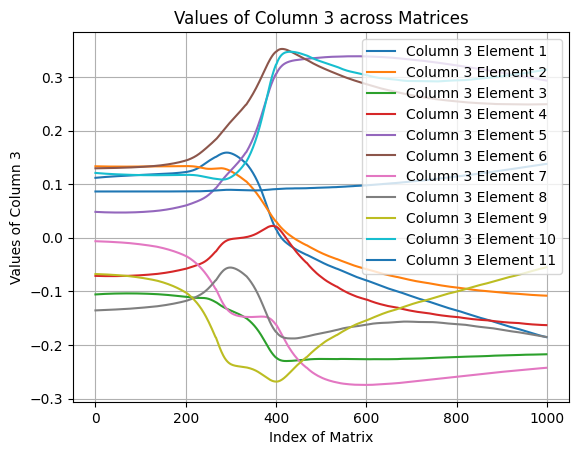

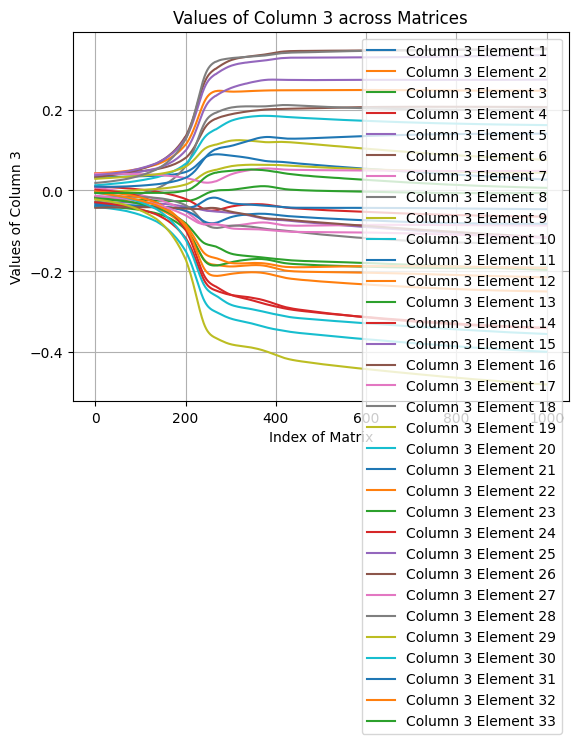

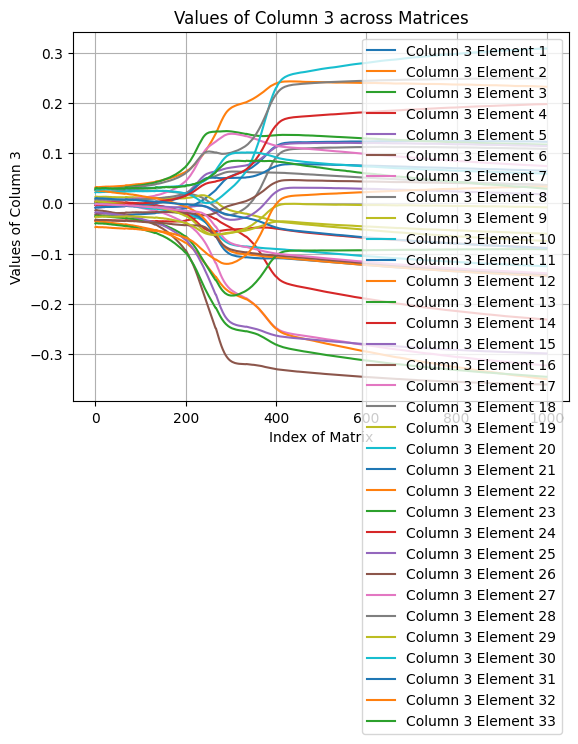

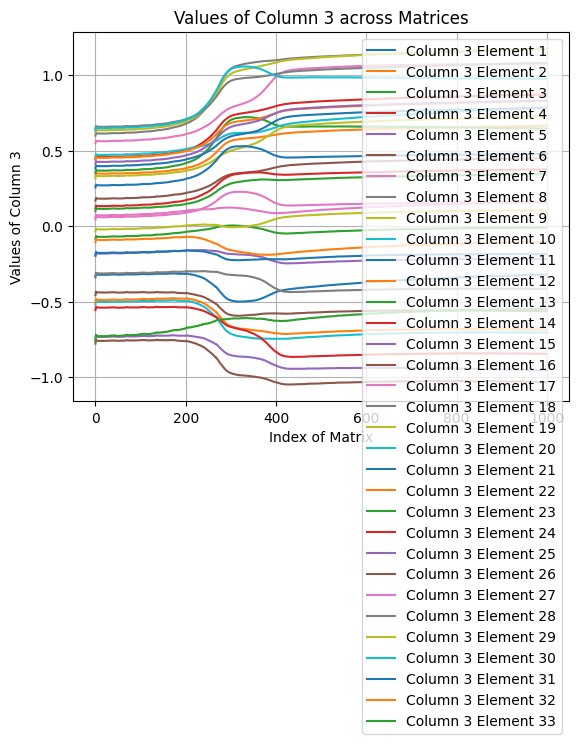

In [13]:
for i in range(4):  
    plot_matrix_column(stats['layers_weights']['layer_' + str(i)], 2)